# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [11]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rosalynbrown/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
# Read your api key environment variable
load_dotenv('/Users/rosalynbrown/KEY.env')
api_key = os.getenv("news_api")

In [13]:
os.environ

environ{'TERM_PROGRAM': 'Apple_Terminal',
        'SHELL': '/bin/bash',
        'TERM': 'xterm-color',
        'TMPDIR': '/var/folders/45/wmr06kc12g31brh1hg21n5sh0000gn/T/',
        'CONDA_SHLVL': '1',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'TERM_PROGRAM_VERSION': '440',
        'OLDPWD': '/Users/rosalynbrown/Desktop/gwu-virt-fin-pt-04-2021-u-c/02-Homework',
        'TERM_SESSION_ID': '9F898777-77C5-486B-8E17-D8D03BC519F4',
        'USER': 'rosalynbrown',
        'CONDA_EXE': '/Users/rosalynbrown/opt/anaconda3/bin/conda',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.9scxEUrESi/Listeners',
        '_CE_CONDA': '',
        'PATH': '/Users/rosalynbrown/opt/anaconda3/bin:/Users/rosalynbrown/opt/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin',
        'CONDA_PREFIX': '/Users/rosalynbrown/opt/anaconda3',
        '__CFBundleIdentifier': 'com.apple.Terminal',
        'PWD': '/Users/rosalynbrown/Desktop/gwu-virt-fin-pt-04-2021-u-c/02-Homework/12-NLP',
 

In [14]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [15]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en", 
    
)

# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8292


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Elon Musk says Tesla will resume Bitcoin purchases when Bitcoin gets greener',
 'description': "It's all about clean energy, it seems.\xa0\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoins and that it will start accepting Bitcoin for purchases, an…",
 'url': 'https://mashable.com/article/tesla-bitcoin-purchases-green/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F14%252Fcc%252Faf6b974e89a64972a334f8675f5dc80a.36e5a.jpg%252F1200x630.jpg?signature=XiWTfhyod6_Xl2i4nyhER_1xCXQ=',
 'publishedAt': '2021-06-14T07:15:49Z',
 'content': "It's all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]"}

In [16]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)

In [17]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.108,0.058,0.833


In [18]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000
1,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
2,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
3,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806
4,2021-07-05,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850


In [19]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.033525,0.044050,0.043450,0.912450
std,0.338398,0.056322,0.053315,0.078077
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.300350,0.000000,0.000000,0.853000
50%,0.000000,0.000000,0.028500,0.923000
75%,0.146575,0.089250,0.075500,0.967750
max,0.690800,0.169000,0.184000,1.000000


In [20]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.055955,0.040500,0.026800,0.932700
std,0.364838,0.058708,0.034713,0.053304
min,-0.381800,0.000000,0.000000,0.806000
25%,-0.278900,0.000000,0.000000,0.920000
50%,0.000000,0.000000,0.000000,0.931000
75%,0.361200,0.074750,0.060250,0.961000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score.

Q: Which coin had the highest mean compound score?

A: Ethereum had the highest compound score

Q. Which coin had the highest positive score?

A: The have the same compount score of 20

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [23]:
# Complete the tokenizer function
# tokenizer('today is a good day')
def tokenizer(text):
    """Tokenizes text."""
    
    # split into words by white space
    words = text.split()
    # words========>['today', 'is', 'a', 'good', 'day']
    
    # Remove the punctuation from text
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    print(stripped[:100])
    # stripped=========>['today', 'is', 'a', 'good', 'day']
    
    # Create a tokenized list of the words
    # strippped
    
    # Lemmatize words into root words
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import wordnet
    lem = WordNetLemmatizer()
    lemmatized=[]
    for each_word in stripped: 
        lemmatized.append(lem.lemmatize(each_word))
    # lemmtized======>['today', 'be', 'a', 'good', 'day']
   
    # Convert the words to lowercase
    words = [word.lower() for word in lemmatized]
    # words======>['today', 'be', 'a', 'good', 'day']
    
    # Remove the stop words
    
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    return words

In [24]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

['Its', 'all', 'about', 'clean', 'energy', 'it', 'seems', 'Elon', 'Musk', 'and', 'Tesla', 'caused', 'ripples', 'in', 'the', 'cryptocurrency', 'market', 'in', 'the', 'past', 'few', 'months', 'first', 'by', 'announcing', 'that', 'Tesla', 'had', 'bought', '15', 'billion', 'worth', 'of', 'bitcoi…', '2508', 'chars']
['Filed', 'under', 'The', 'supply', 'chain', 'attack', 'has', 'reached', 'over', 'a', 'thousand', 'organizations', 'Illustration', 'by', 'Alex', 'Castro', '', 'The', 'Verge', 'Three', 'days', 'after', 'ransomware', 'attackers', 'started', 'the', 'holiday', 'weekend', 'by', 'comprom…', '3376', 'chars']
['image', 'copyrightGetty', 'Images', 'The', 'gang', 'behind', 'a', 'colossal', 'ransomware', 'attack', 'has', 'demanded', '70m', '£505m', 'paid', 'in', 'Bitcoin', 'in', 'return', 'for', 'a', 'universal', 'decryptor', 'that', 'it', 'says', 'will', 'unlock', 'the', 'files', 'of', 'all', '…', '4140', 'chars']
['SAN', 'SALVADOR', 'June', '16', 'Reuters', '', 'El', 'Salvador', 'will', 

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831,"[clean, energy, seems, elon, musk, tesla, caus..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, supply, chain, attack, ha, reached, th..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, images, gang, behind, ..."
3,2021-06-16,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957,"[san, salvador, june, 16, reuters, , el, salva..."
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.108,0.058,0.833,"[london, june, 23, reuters, , el, salvador, de..."


In [25]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

['TLDR', 'The', 'Cryptocurrency', 'with', 'Ethereum', 'and', 'Solidity', 'Blockchain', 'Developer', 'Bundle', 'is', 'on', 'sale', 'for', '£2125', 'as', 'of', 'June', '17', 'saving', 'you', '97', 'on', 'list', 'price', 'Is', 'everyone', 'you', 'know', 'investing', 'in', 'cryptocurrency', '…', '949', 'chars']
['It', 'wasnt', 'long', 'ago', 'that', 'your', 'average', 'person', 'had', 'no', 'clue', 'what', 'an', 'NFT', 'was', 'Nowadays', 'theyre', 'making', 'headlines', 'for', 'selling', 'for', 'hundreds', 'of', 'thousands', 'of', 'bucks', 'Predictably', 'folks', 'are', 'learning', 'about', 'NFTs', '…', '3056', 'chars']
['Bitcoin', 'and', 'Ethereum', 'Yuriko', 'Nakao', 'Ether', 'overtook', 'bitcoin', 'in', 'the', 'number', 'of', 'active', 'addresses', 'on', 'its', 'network', 'on', 'Friday', 'a', 'sign', 'that', 'demand', 'is', 'faltering', 'for', 'the', 'worlds', 'biggest', 'cryptocurrency', 'as', 'its', 'co…', '2727', 'chars']
['Ether', 'holders', 'have', 'staked', 'more', 'than', '13', '

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
2,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereum, yuriko, nakao, ether, over..."
3,2021-07-05,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, 13, billion, worth, cr..."
4,2021-07-05,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850,"[ether, cryptocurrency, ethereum, network, pho..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
bigram_counts_B = Counter(ngrams(bitcoin_df, n=2))
print(dict(bigram_counts_B))

{('date', 'text'): 1, ('text', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'tokens'): 1}


In [28]:
# Generate the Ethereum N-grams where N=2
bigram_counts_E = Counter(ngrams(ethereum_df, n=2))
print(dict(bigram_counts_E))

{('date', 'text'): 1, ('text', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'tokens'): 1}


In [29]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [30]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_df, 10)
bitcoin_common

[('date', 1),
 ('text', 1),
 ('compound', 1),
 ('positive', 1),
 ('negative', 1),
 ('neutral', 1),
 ('tokens', 1)]

In [31]:
# Use token_count to get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_df,10)
ethereum_common

[('date', 1),
 ('text', 1),
 ('compound', 1),
 ('positive', 1),
 ('negative', 1),
 ('neutral', 1),
 ('tokens', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

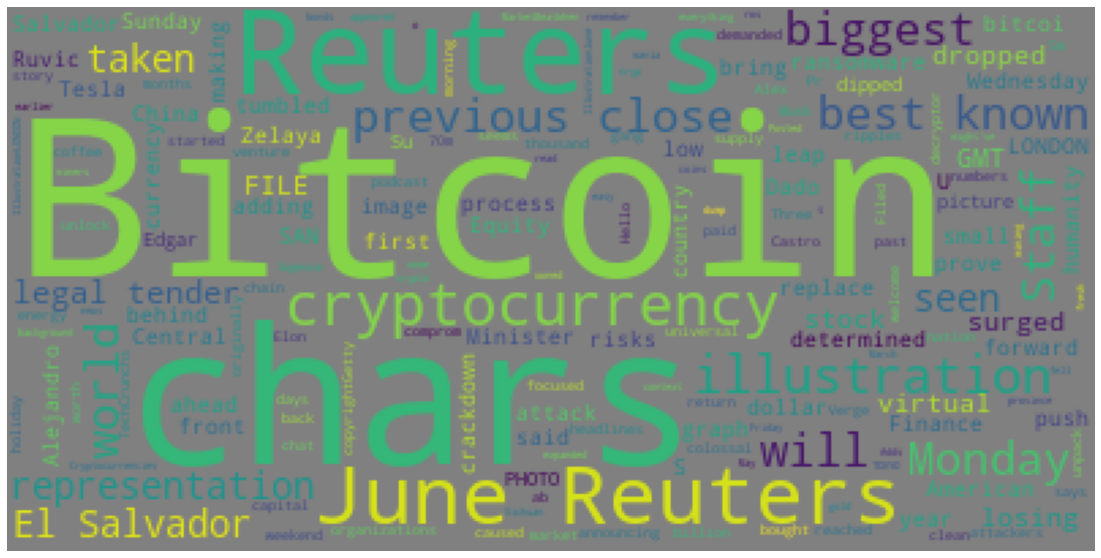

In [33]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(bitcoin_df.text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

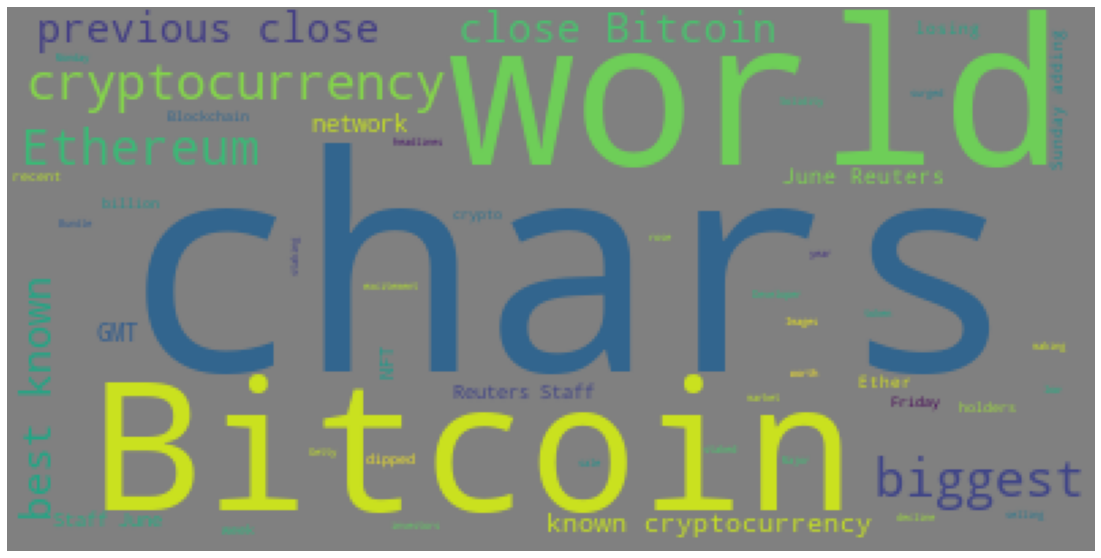

In [34]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(ethereum_df.text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [1]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

In [2]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

NameError: name 'spacy' is not defined

---
### Bitcoin NER

In [3]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = bitcoin_df.text.str.cat()
all_concat_bitcoin

NameError: name 'bitcoin_df' is not defined

In [4]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc
# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

NameError: name 'nlp' is not defined

In [5]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

NameError: name 'displacy' is not defined

In [6]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

NameError: name 'bitcoin_doc' is not defined

---

### Ethereum NER

In [9]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = ethereum_df.text.str.cat()
all_concat_ethereum

NameError: name 'ethereum_df' is not defined

In [32]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc

# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [34]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

---